In [63]:
import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv('~/dsi/Submissions/Projects/project-5-group-project-master/kivamix.csv')

In [6]:
df.shape

(419156, 35)

`Cleaning/EDA`
---

In [7]:
df.head(2)

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,year
0,1455352,Raisa Jokasta,Spanish,"En la ciudad de Portoviejo, conocida como la c...",The city of Portoviejo is located in the valle...,1075.0,1075.0,1,2638561.0,NaN,...,12,1,1,"#Repeat Borrower, #Health and Sanitation",Raisa Jokasta,female,true,monthly,field_partner,2018
1,1727469,Lorna,English,"Lorna is a married woman, 39 years old with fi...","Lorna is a married woman, 39 years old with fi...",225.0,400.0,0,3108106.0,NaN,...,8,1,1,"#Woman-Owned Business, #Parent",Lorna,female,true,monthly,field_partner,2019


In [65]:
#Converting long text columns to length of words and count of characters
#Step1 is to drop nulls
df = df.drop(df[(df['DESCRIPTION_TRANSLATED'].isnull()==True)].index)
df = df.drop(df[(df['TAGS'].isnull()==True)].index)
df = df.drop(df[(df['LOAN_USE'].isnull()==True)].index)


#Step 2 is to update new columns
def word_len_count(column):
    word_count = len(column.split())
    return word_count

df['word_count_DT'] = df['DESCRIPTION_TRANSLATED'].apply(word_len_count)
df['word_count_TAGS'] = df['TAGS'].apply(word_len_count)
df['word_count_LU'] = df['LOAN_USE'].apply(word_len_count)

def char_len_count(column):
    char_count = column.replace(' ','')
    char_count = len(char_count[:])
    return char_count

df['char_count_DT'] = df['DESCRIPTION_TRANSLATED'].apply(char_len_count)
df['char_count_TAGS'] = df['TAGS'].apply(char_len_count)
df['char_count_LU'] = df['LOAN_USE'].apply(char_len_count)

In [66]:
#Mark whether Image and Video was provided
df['IMAGE_ID'] = np.where(df['IMAGE_ID'].isnull(), 0, 1)
df['VIDEO_ID'] = np.where(df['VIDEO_ID'].isnull(), 0, 1)

## Parse out borrower genders & borrower pictured
df['FEM_COUNT'] = df['BORROWER_GENDERS'].str.count("female")
df['MALE_COUNT'] = df['BORROWER_GENDERS'].str.count("male")
df['PIC_TRUE_COUNT'] = df['BORROWER_PICTURED'].str.count("true")
df['PIC_FALSE_COUNT'] = df['BORROWER_PICTURED'].str.count("false")


df['ANY_FEM'] = df['BORROWER_GENDERS'].str.contains('female').map({True:1, False:0})
df['ANY_MALE'] = df['BORROWER_GENDERS'].str.contains('male').map({True:1, False:0})
df['month'] = df['POSTED_TIME'].str[6:7]


#Drop unrequired columns to run numeric models

df.drop(columns = ['DESCRIPTION_TRANSLATED', 'LOAN_USE', 'TAGS', 'DESCRIPTION','LOAN_ID','LOAN_NAME', 'FUNDED_AMOUNT',
                     'DESCRIPTION', 'TOWN_NAME', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID', 'PLANNED_EXPIRATION_TIME',
                     'DISBURSE_TIME', 'POSTED_TIME', 'RAISED_TIME', 'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES',
                     'BORROWER_NAMES', 'COUNTRY_NAME', 'CURRENCY_POLICY','year', 'BORROWER_GENDERS', 'BORROWER_PICTURED', 'IMAGE_ID',
                     'VIDEO_ID'], inplace=True)

In [11]:
df.columns

Index(['ORIGINAL_LANGUAGE', 'LOAN_AMOUNT', 'STATUS', 'ACTIVITY_NAME',
       'SECTOR_NAME', 'COUNTRY_CODE', 'LENDER_TERM', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'word_count_DT', 'word_count_TAGS',
       'word_count_LU', 'char_count_DT', 'char_count_TAGS', 'char_count_LU',
       'FEM_COUNT', 'MALE_COUNT', 'PIC_TRUE_COUNT', 'PIC_FALSE_COUNT',
       'ANY_FEM', 'ANY_MALE', 'month'],
      dtype='object')

In [12]:
df['COUNTRY_CODE'].unique()

array(['EC', 'PH', 'IN', 'PK', 'CO', 'KE', 'UG', 'KH', 'HN', 'RW', 'SV',
       'TJ', 'ZW', 'NG', 'EG', 'LB', 'PE', 'TZ', 'NI', 'PS', 'VN', 'WS',
       'PY', 'MX', 'CM', 'MG', 'GT', 'US', 'AM', 'BO', 'MD', 'XK', 'LR',
       'TG', 'LS', 'MZ', 'KG', 'ML', 'SL', 'MW', 'AL', 'TL', 'JO', 'GH',
       'BF', 'CD', 'FJ', 'MM', 'LA', 'GE', 'HT', 'SB', 'AZ', 'ID', 'PG',
       'SN', 'TR', 'YE', 'BR', 'UA', 'ZM', 'NP', 'CR', 'TO', 'ZA', 'PR',
       'DO', 'BI', 'TH', 'CG', 'SR', 'CN', 'PA', 'IL', 'SO', 'BJ', 'BZ',
       nan, 'MN', 'IQ', 'SS', 'VC', 'AF', 'BD'], dtype=object)

In [13]:
df[df['COUNTRY_CODE']=='KE']

,ORIGINAL_LANGUAGE,LOAN_AMOUNT,STATUS,ACTIVITY_NAME,SECTOR_NAME,COUNTRY_CODE,LENDER_TERM,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,word_count_DT,...,char_count_DT,char_count_TAGS,char_count_LU,FEM_COUNT,MALE_COUNT,PIC_TRUE_COUNT,PIC_FALSE_COUNT,ANY_FEM,ANY_MALE,month
7,English,600.0,1,Farming,Agriculture,KE,20.0,monthly,field_partner,208,...,936,7,109,1,1,1,0,1,1,7
16,English,200.0,1,Poultry,Agriculture,KE,11.0,monthly,field_partner,103,...,516,52,31,1,1,1,0,1,1,5
21,English,500.0,0,Beauty Salon,Services,KE,15.0,monthly,field_partner,74,...,331,42,36,1,1,1,0,1,1,8
41,English,500.0,1,Retail,Retail,KE,14.0,monthly,field_partner,108,...,541,36,56,1,1,1,0,1,1,8
72,English,200.0,1,Farming,Agriculture,KE,14.0,monthly,field_partner,97,...,456,13,98,0,1,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419104,English,500.0,1,Farming,Agriculture,KE,14.0,monthly,field_partner,170,...,837,28,133,1,1,1,0,1,1,9
419106,English,300.0,1,General Store,Retail,KE,15.0,monthly,field_partner,93,...,404,28,60,1,1,1,0,1,1,0
419117,English,300.0,0,Retail,Retail,KE,14.0,monthly,field_partner,83,...,418,23,23,0,1,1,0,0,1,8
419137,English,875.0,0,Farming,Agriculture,KE,11.0,bullet,field_partner,173,...,789,105,66,4,11,11,0,1,1,1


In [67]:
cond = df['ACTIVITY_NAME'].value_counts()
threshold = 2000
df['ACTIVITY_NAME'] = np.where(df['ACTIVITY_NAME'].isin(cond.index[cond >= threshold ]), df['ACTIVITY_NAME'], 'misc_activity_name')

cond = df['COUNTRY_CODE'].value_counts()
threshold = 2000
df['COUNTRY_CODE'] = np.where(df['COUNTRY_CODE'].isin(cond.index[cond >= threshold ]), df['COUNTRY_CODE'], 'misc_country_code')

In [68]:
#Creating interraction terms
df['word_char_DT'] = df['word_count_DT'] * df['char_count_DT']
df['word_char_TAGS'] = df['word_count_TAGS'] * df['char_count_TAGS']
df['word_char_LU'] = df['word_count_LU'] * df['char_count_LU']

df['MALE_FEM'] = df['MALE_COUNT']*df['FEM_COUNT']
df['MALE_PIC'] = df['MALE_COUNT']*df['PIC_TRUE_COUNT']
df['FEM_PIC'] = df['FEM_COUNT']*df['PIC_TRUE_COUNT']



In [69]:
df_kenya = df[df['COUNTRY_CODE']=='KE']

In [18]:
df_kenya.shape

(42163, 28)

`Modeling`
---

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
import statsmodels.api as sm
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score,confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [20]:
df_kenya.head()

,ORIGINAL_LANGUAGE,LOAN_AMOUNT,STATUS,ACTIVITY_NAME,SECTOR_NAME,COUNTRY_CODE,LENDER_TERM,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,word_count_DT,...,PIC_FALSE_COUNT,ANY_FEM,ANY_MALE,month,word_char_DT,word_char_TAGS,word_char_LU,MALE_FEM,MALE_PIC,FEM_PIC
7,English,600.0,1,Farming,Agriculture,KE,20.0,monthly,field_partner,208,...,0,1,1,7,194688,7,2725,1,1,1
16,English,200.0,1,Poultry,Agriculture,KE,11.0,monthly,field_partner,103,...,0,1,1,5,53148,260,186,1,1,1
21,English,500.0,0,Beauty Salon,Services,KE,15.0,monthly,field_partner,74,...,0,1,1,8,24494,168,324,1,1,1
41,English,500.0,1,Retail,Retail,KE,14.0,monthly,field_partner,108,...,0,1,1,8,58428,144,672,1,1,1
72,English,200.0,1,Farming,Agriculture,KE,14.0,monthly,field_partner,97,...,0,0,1,2,44232,13,1862,0,1,0


In [21]:
df_kenya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42163 entries, 7 to 419149
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ORIGINAL_LANGUAGE   42163 non-null  object 
 1   LOAN_AMOUNT         42163 non-null  float64
 2   STATUS              42163 non-null  int64  
 3   ACTIVITY_NAME       42163 non-null  object 
 4   SECTOR_NAME         42163 non-null  object 
 5   COUNTRY_CODE        42163 non-null  object 
 6   LENDER_TERM         42163 non-null  float64
 7   REPAYMENT_INTERVAL  42163 non-null  object 
 8   DISTRIBUTION_MODEL  42163 non-null  object 
 9   word_count_DT       42163 non-null  int64  
 10  word_count_TAGS     42163 non-null  int64  
 11  word_count_LU       42163 non-null  int64  
 12  char_count_DT       42163 non-null  int64  
 13  char_count_TAGS     42163 non-null  int64  
 14  char_count_LU       42163 non-null  int64  
 15  FEM_COUNT           42163 non-null  int64  
 16  MAL

In [39]:
df['DISTRIBUTION_MODEL'].value_counts()

field_partner    342609
direct             1979
Name: DISTRIBUTION_MODEL, dtype: int64

In [71]:
df_kenya = pd.get_dummies(df_kenya, columns=['ORIGINAL_LANGUAGE','ACTIVITY_NAME',
                                       'SECTOR_NAME','month',
                                       'REPAYMENT_INTERVAL','DISTRIBUTION_MODEL'],
                                       drop_first=True)

In [84]:
df_kenya.shape

(42163, 87)

In [77]:
X = df_kenya.drop(columns=['STATUS','COUNTRY_CODE'])
y = df_kenya['STATUS']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify=y)

In [79]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [80]:
y.value_counts(normalize=True)

1    0.740792
0    0.259208
Name: STATUS, dtype: float64

In [28]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()                 ## Instantiating 
bdt = BaggingClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
svr = SVC()


reg = [
        LogisticRegression(),
       KNeighborsClassifier(),
       DecisionTreeClassifier(),
       BaggingClassifier(),             # List of desired models
       RandomForestClassifier(),
       AdaBoostClassifier(),
       SVC()
]



def models(X_train,X_test,y_train,y_test,reg_list):   
    
    train_score=[]
    test_score=[]                                               # Function to run all models and evaluate results
    train_RMSE=[]
    test_RMSE=[]
    
    for reg in reg_list:
        
        reg.fit(X_train,y_train)
        train_score.append(reg.score(X_train,y_train))
        test_score.append(reg.score(X_test,y_test))
        train_pred = reg.predict(X_train)
        train_RMSE.append(mean_squared_error(y_train,train_pred))
        test_pred = reg.predict(X_test)
        test_RMSE.append(mean_squared_error(y_test,test_pred))
        
    return pd.DataFrame(data=[train_score, test_score, train_RMSE, test_RMSE],
                 index=['train_score', 'test_score','train_RMSE','test_RMSE'],
                 columns=[str(c) for c in reg_list]).T

models(X_train_sc,X_test_sc, y_train,y_test, reg)

/Users/crivera/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,train_score,test_score,train_RMSE,test_RMSE
LogisticRegression(),0.804503,0.802580,0.195497,0.197420
KNeighborsClassifier(),0.845835,0.774879,0.154165,0.225121
DecisionTreeClassifier(),1.000000,0.758277,0.000000,0.241723
BaggingClassifier(),0.990576,0.798122,0.009424,0.201878
RandomForestClassifier(),1.000000,0.820605,0.000000,0.179395
AdaBoostClassifier(),0.812725,0.812447,0.187275,0.187553
SVC(),0.816362,0.807134,0.183638,0.192866


In [81]:
logreg = LogisticRegression(solver='liblinear', max_iter=1200)

In [82]:
logreg.fit(X_train_sc,y_train)
print(f'{logreg.score(X_train_sc,y_train)}')
logreg.score(X_test_sc,y_test)

0.8045348175320979


0.8024855326819087

In [83]:
coef= logreg.coef_[0]
coef_df = pd.DataFrame({'coefficients': coef, 'features': X_train.columns}).sort_values(by = 'coefficients', ascending = False, key = abs).head(20)
coef_df

,coefficients,features
15,2.123993,word_char_TAGS
3,-1.550912,word_count_TAGS
0,-1.524924,LOAN_AMOUNT
8,1.338576,FEM_COUNT
42,1.011554,ACTIVITY_NAME_Home Energy
2,-0.739718,word_count_DT
18,0.738925,MALE_PIC
10,-0.701225,PIC_TRUE_COUNT
9,-0.700278,MALE_COUNT
65,0.568529,SECTOR_NAME_Health


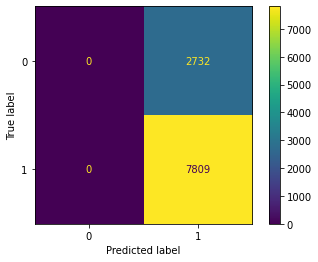

In [76]:
#get predictions 
preds = logreg.predict(X_test)

#plot confusion matrix
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm).plot();

In [85]:
ada = AdaBoostClassifier()

In [86]:
ada.fit(X_train_sc,y_train)

AdaBoostClassifier()

In [87]:
ada.score(X_train_sc,y_train)

0.8127253178167099

In [88]:
ada.score(X_test_sc,y_test)

0.8124466369414667